In [2]:
pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext_assistant                    0.4.0
aext_assistant_server             0.4.0
aext_core                         0.4.0
aext_core_server                  0.4.0
aext_shared                       0.4.0
aiobotocore                       2.7.0
aiofiles                          22.1.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
aiosqlite                         0.18.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                  

In [3]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) 

In [6]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
import cv2
import imghdr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'ImageClassification\data'
image_exts = ['jpeg','jpg','bmp','png']


In [9]:
os.listdir(data_dir)

['happy', 'sad']

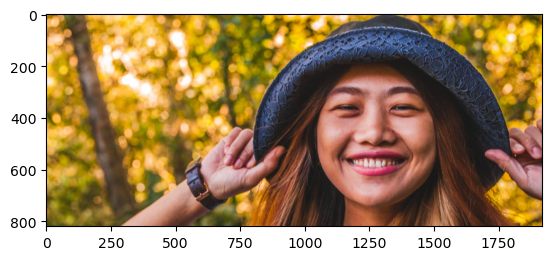

In [10]:
img = cv2.imread(os.path.join('ImageClassification','data','happy','traitshappypeople.jpg'))
img.shape
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Dodgy images removal

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

Issue with imageImageClassification\data\happy\.ipynb_checkpoints
Issue with imageImageClassification\data\sad\.ipynb_checkpoints


In [12]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory('ImageClassification/data')

Found 168 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [97]:
batch[1]

array([0, 0, 0, 1, 1, 0, 0, 0])

In [17]:
scaled = batch[0]/255
scaled.max()

1.0

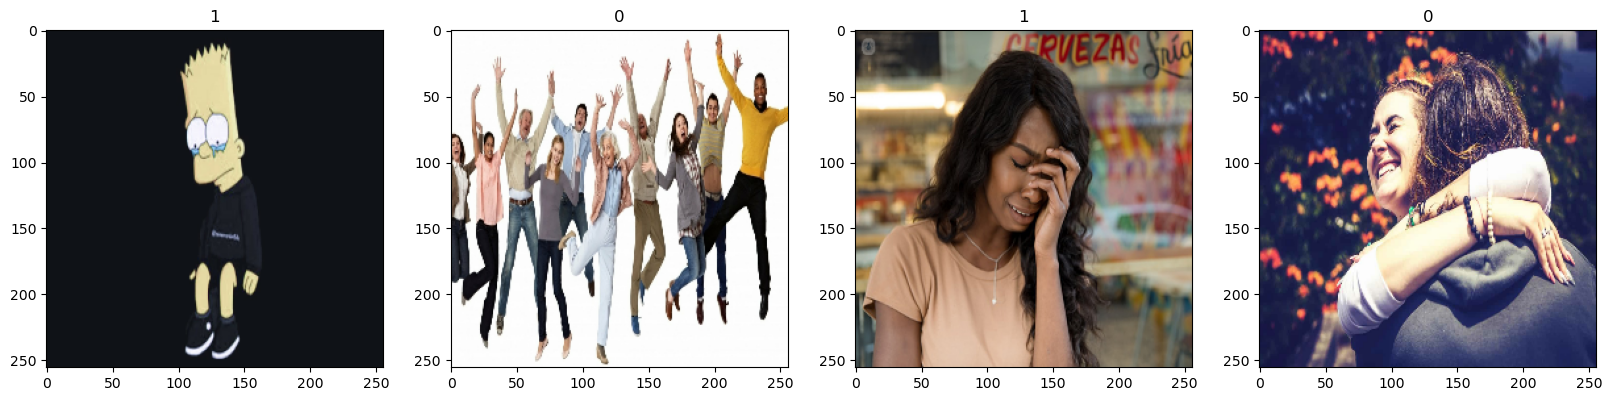

In [18]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# preprocess

In [19]:
data = data.map(lambda x,y: (x/255,y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()


In [22]:
batch[0].min()

0.0

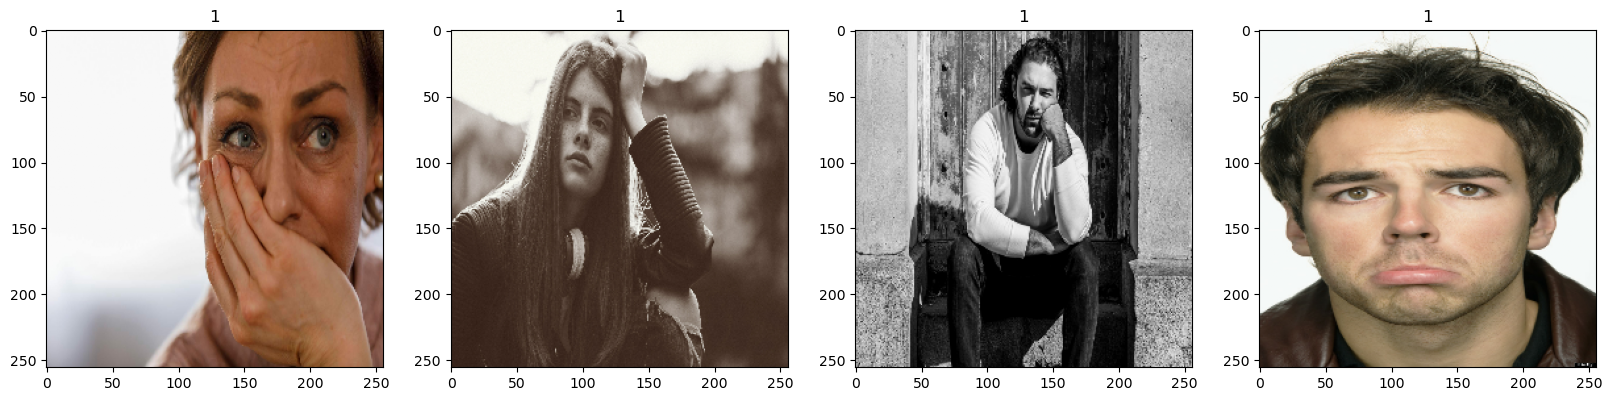

In [23]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

6

In [25]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [26]:
train_size+val_size+test_size

6

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
len(test)

1

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
 logdir = 'logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [36]:
hist = model.fit(train,epochs=20,validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.6510 - loss: 0.8271 - val_accuracy: 0.3438 - val_loss: 0.7830
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.4258 - loss: 0.7474 - val_accuracy: 0.5781 - val_loss: 0.6371
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.5547 - loss: 0.6396 - val_accuracy: 0.5938 - val_loss: 0.6278
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.6133 - loss: 0.6210 - val_accuracy: 0.5156 - val_loss: 0.6409
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.6471 - loss: 0.5792 - val_accuracy: 0.8750 - val_loss: 0.5446
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.7878 - loss: 0.5618 - val_accuracy: 0.6094 - val_loss: 0.5371
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 0.7096 - loss: 0.5113 - val_accuracy: 0.7031 - val_loss: 0.4672
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.7357 - loss: 0.4713 - val_accuracy: 0.8281 - val_loss:

In [37]:
hist.history

{'accuracy': [0.6458333134651184,
  0.4375,
  0.625,
  0.59375,
  0.6770833134651184,
  0.7708333134651184,
  0.7083333134651184,
  0.7604166865348816,
  0.8333333134651184,
  0.9270833134651184,
  0.8645833134651184,
  0.7708333134651184,
  0.8020833134651184,
  0.875,
  0.8958333134651184,
  0.8958333134651184,
  0.8541666865348816,
  0.9583333134651184,
  0.9479166865348816,
  0.9583333134651184],
 'loss': [0.8588477969169617,
  0.7444118857383728,
  0.5884276628494263,
  0.6397415399551392,
  0.5853356122970581,
  0.5541723966598511,
  0.4963127672672272,
  0.45964816212654114,
  0.4628845751285553,
  0.31797686219215393,
  0.3529392182826996,
  0.4133700430393219,
  0.3704793453216553,
  0.26812607049942017,
  0.3206137418746948,
  0.22669367492198944,
  0.2933661937713623,
  0.1988440304994583,
  0.20685841143131256,
  0.1611107438802719],
 'val_accuracy': [0.34375,
  0.578125,
  0.59375,
  0.515625,
  0.875,
  0.609375,
  0.703125,
  0.828125,
  0.8125,
  0.8125,
  0.90625,
  0.

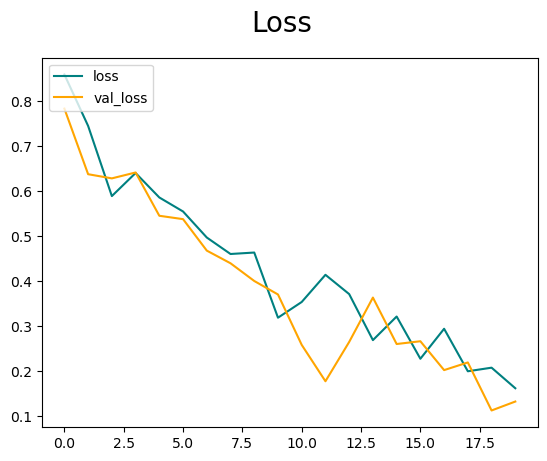

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc='upper left')
plt.show()

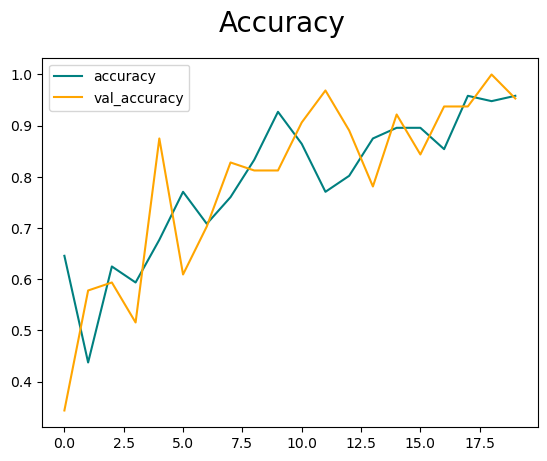

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X,y = batch 
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [44]:
len(test)

1

In [45]:
print(f'Pricision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Pricision:1.0,Recall:1.0, Accuracy:1.0


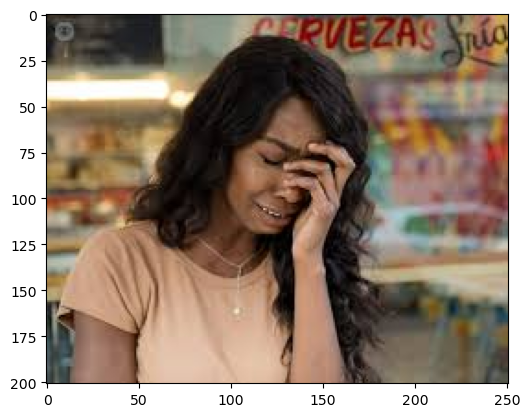

In [70]:
img = cv2.imread('ImageClassification/test/sad_test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

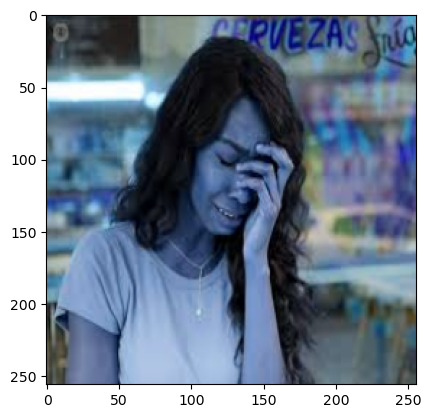

In [71]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
resize.shape

TensorShape([256, 256, 3])

In [73]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

# test


In [74]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [75]:
yhat

array([[0.8992897]], dtype=float32)

In [76]:
if yhat >0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('ImageClassification/models','happysadmodel.h5'))

In [81]:
new_model = load_model(os.path.join('ImageClassification/models','happysadmodel.h5'))

In [84]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [85]:
if yhat_new >0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Api creation

In [94]:
pip install Flask


In [95]:
from flask import Flask, request, jsonify
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

app = Flask(__name__)

# Load the pre-trained model
model = tf.keras.models.load_model('ImageClassification/models/happysadmodel.h5')

# Define function to preprocess image
def preprocess_image(image):
    size = (256, 256)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    img_array = np.asarray(image)
    img_array = img_array / 255.0
    img_reshape = img_array[np.newaxis, ...]
    return img_reshape

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the image file from the request
        file = request.files['file']
        image = Image.open(file)
        img_data = preprocess_image(image)
        predictions = model.predict(img_data)
        class_names = ['Happy', 'Sad']
        predicted_class = class_names[np.argmax(predictions)]
        return jsonify({'prediction': predicted_class})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
